In [51]:
import locale
locale.setlocale(locale.LC_ALL, "ru_RU")

# Функция вывода матрицы для перезаписи в LaTex:

def print_matrix(matrix):
    if len(matrix.shape) == 2:
        for i in range(matrix.shape[0]):
            row = ''
            for j in range(matrix.shape[1]):
                kek = matrix[i][j]
                if kek > 0:
                    row += locale.str((round(kek, 5))) + ' & '
                else:
                    row += locale.str((round(kek, 4))) + ' & '
            row = row[:-2]
            row += '\\\\'
            print(row)
    elif len(matrix.shape) == 1:
        row = ''
        for i in range(matrix.shape[0]):
            kek = matrix[i]
            if kek > 0:
                row += locale.str((round(kek, 5))) + ' \\\\ '
            else:
                row += locale.str((round(kek, 4))) + ' \\\\ '
        print(row)

In [79]:
# Задание 1.1:
# Найти решение системы линейных уравнений методом простой итерации с точностью 0.01
import numpy as np
N, n = 13, 53
beta = 1 - 0.02 * (49 - n)
print(f"beta: {beta}\n")

# Исходные данные:
A = np.array([[10 * beta, 1, 2, 3],
              [1, 10 * beta, 3, -2],
              [2, -3, 10 * beta, 1],
              [3, 2, -1, 10 * beta]])

print("Матрица А:", *A, sep='\n')

# Вывод вектора b
x = np.array([1, 1, 1, 1])
b = np.dot(A, x)
print("\nВектор b:\n", b)

# Приведение исходной СЛАУ A*x = b к равносильной x = F*x + g:
# где F =  E - D*A, ||F|| < 1 и g = D*b

# Матрица D
D = np.array([[round(1 / A[i][j], 6) if i == j else 0 for j in range(len(A[i]))] for i in range(len(A))])
print("\nМатрица D:", *D, sep='\n', end='\n')
print_matrix(D)

F = np.eye(4) - D.dot(A)
print("\nМатрица F:", *F, sep='\n')
print_matrix(F)
        
g = D.dot(b)
print("\nВектор g =", g)
print_matrix(g)

# Решение теоретического неравенства оценки:
F_cheb = max(np.sum(abs(F), axis=1))
G_cheb = max(abs(g))

k = 0
while True:
    x = F_cheb ** k / (1 - F_cheb) * G_cheb
    if abs(x) < 0.01:
        break
    k += 1
print(f"\nТеоретическое количество итераций: {k}\n")

# Решение данной СЛАУ:
x = np.zeros(4)
error = 1
i = 0
while error > 0.01:
    i += 1
    x = F.dot(x) + g
    error = max(abs(x - [1, 1, 1, 1]))
    print(f'x_{i}:')
    print_matrix(x)
    print('e:', round(error, 5), '\n')
print("Эмпирическое количество итераций:", i)

beta: 1.08

Матрица А:
[10.8  1.   2.   3. ]
[ 1.  10.8  3.  -2. ]
[ 2.  -3.  10.8  1. ]
[ 3.   2.  -1.  10.8]

Вектор b:
 [16.8 12.8 10.8 14.8]

Матрица D:
[0.092593 0.       0.       0.      ]
[0.       0.092593 0.       0.      ]
[0.       0.       0.092593 0.      ]
[0.       0.       0.       0.092593]
0,09259 & 0 & 0 & 0 \\
0 & 0,09259 & 0 & 0 \\
0 & 0 & 0,09259 & 0 \\
0 & 0 & 0 & 0,09259 \\

Матрица F:
[-4.40000e-06 -9.25930e-02 -1.85186e-01 -2.77779e-01]
[-9.25930e-02 -4.40000e-06 -2.77779e-01  1.85186e-01]
[-1.85186e-01  2.77779e-01 -4.40000e-06 -9.25930e-02]
[-2.77779e-01 -1.85186e-01  9.25930e-02 -4.40000e-06]
-0 & -0,0926 & -0,1852 & -0,2778 \\
-0,0926 & -0 & -0,2778 & 0,18519 \\
-0,1852 & 0,27778 & -0 & -0,0926 \\
-0,2778 & -0,1852 & 0,09259 & -0 \\

Вектор g = [1.5555624 1.1851904 1.0000044 1.3703764]
1,55556 \\ 1,18519 \\ 1 \\ 1,37038 \\ 

Теоретическое количество итераций: 10

x_1:
1,55556 \\ 1,18519 \\ 1 \\ 1,37038 \\ 
e: 0.55556 

x_2:
0,87997 \\ 1,01715 \\ 0,91427 \\

In [70]:
# Задание 1.2
# Найти решение системы линейных уравнений методом Зейделя с точностью 0.01

# Матрица D - диагональная от элементов матрицы F:
D = np.zeros((4, 4))
for i in range(4):
    D[i][i] = F[i][i]

# Матрица B - нижнетреугольная от матрицы F:
B = np.tril(F) + D

# Вспомогательные расчёты:
Q = B - D
P = F - Q

# Вывод:
print('Q:')
print_matrix(Q)
print('\nP:')
print_matrix(P)

Q:
-0 & 0 & 0 & 0 \\
-0,0926 & -0 & 0 & 0 \\
-0,1852 & 0,27778 & -0 & 0 \\
-0,2778 & -0,1852 & 0,09259 & -0 \\

P:
0 & -0,0926 & -0,1852 & -0,2778 \\
0 & 0 & -0,2778 & 0,18519 \\
0 & 0 & 0 & -0,0926 \\
0 & 0 & 0 & 0 \\


In [80]:
# Решение СЛАУ методом Зейделя:

# y - пустая матрица, которую будем заполнять решениями по итерациям
y = np.zeros(4)

# Единичная матрица:
E = np.eye(4)
error = 1
i = 0

while error > 0.01:
    i += 1
    y = np.linalg.inv(E - Q) @ P @ y + np.linalg.inv(E - Q) @ g
    error = max(abs(y - [1, 1, 1, 1]))
    print(f'y_{i}:')
    print_matrix(y)
    print('e = ', round(error, 5), '\n')

y_1:
1,55556 \\ 1,04115 \\ 1,00114 \\ 0,83816 \\ 
e =  0.55556 

y_2:
1,04093 \\ 0,96592 \\ 0,99794 \\ 0,99475 \\ 
e =  0.04093 

y_3:
1,005 \\ 0,99914 \\ 0,99932 \\ 0,99871 \\ 
e =  0.005 



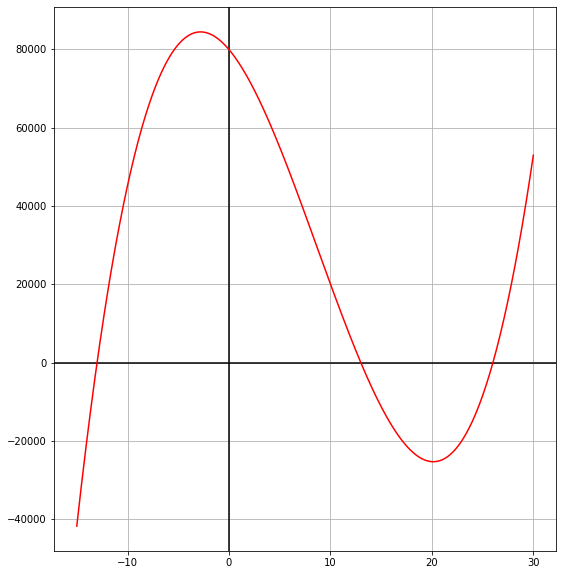

In [60]:
# Задание 2
import numpy as np
import matplotlib.pyplot as plt

# Все исходные данные:
epsilon = 0.0001
n = 53
N, alpha = 13, 0.003 * (n - 50)
x = np.linspace(-15, 30, 500)
y = (N + 5.2 + (-1)**N * alpha) * x**3 - (2 * N**2 + 10.4 * N + (-1)**(N + 1) * alpha) * x**2 - N**2 * (N + 5.2)*(x - 2*N) + (-1)**N * alpha

# Уравнение имеет вид: 18.191*x^3 - 473.209*x^2 - 3075.8 * (x - 26) - 0.009

# Корни получаются: 
#x1 = -13.0009886925878
#x2 = 12.9965401560624
#x2 = 26.017806790607

# График левой части уравнения:
plt.figure(figsize=(9,10))
plt.grid()
plt.axhline(y=0, color='k')    
plt.axvline(x=0, color='k')
plt.plot(x, 
         y,
         color = 'red')
plt.show()

In [64]:
# Метод касательных: [берём отрезок от -15 до -10] - Левый корень
from scipy import misc
def f(x):
    return 18.191 * x**3 - 473.209 * x**2 - 3075.8 * (x - 26) - 0.009

x_otv = -13.0009886925878
x = -15
i = 0
while True:
    i += 1
    x = x - f(x) / sc.misc.derivative(f, x, dx = 1e-10)
    print(f"{i}-ая итерация, {round(x, 10)} - корень, {round(abs(x - x_otv), 10)} - epsilon значение")
    if abs(x - x_otv) < epsilon:
        break

1-ая итерация, -13.2153825959 - корень, 0.2143939033 - epsilon значение
2-ая итерация, -13.0038745314 - корень, 0.0028858388 - epsilon значение
3-ая итерация, -13.0009892341 - корень, 5.415e-07 - epsilon значение


In [65]:
# Метод секущих: [берём отрезок от 20 до 30] - Правый корень

x_otv = 26.017806790607
x = 20
b = 30
i = 0
while True:
    i += 1
    x = x - f(x) * (x - b) / (f(x) - f(b))
    print(f"{i}-ая итерация, {round(x, 10)} - корень, {('%.10f' % round(abs(x - x_otv), 10)).rstrip('0').rstrip('.')} - epsilon значение")
    if abs(x - x_otv) < epsilon:
        break

1-ая итерация, 23.2326485789 - корень, 2.7851582117 - epsilon значение
2-ая итерация, 25.0048321245 - корень, 1.0129746661 - epsilon значение
3-ая итерация, 25.6892817752 - корень, 0.3285250154 - epsilon значение
4-ая итерация, 25.9155981832 - корень, 0.1022086075 - epsilon значение
5-ая итерация, 25.9864327977 - корень, 0.031373993 - epsilon значение
6-ая итерация, 26.0082163546 - корень, 0.009590436 - epsilon значение
7-ая итерация, 26.0148789302 - корень, 0.0029278604 - epsilon значение
8-ая итерация, 26.0169132953 - корень, 0.0008934953 - epsilon значение
9-ая итерация, 26.0175341552 - корень, 0.0002726354 - epsilon значение
10-ая итерация, 26.0177236034 - корень, 0.0000831872 - epsilon значение


In [66]:
# Метод деления отрезка пополам: [берём отрезок от 10 до 15] - Серединный корень
a = 10
b = 15
i = 0
x_otv = 12.9965401560624
while True:
    i += 1
    x = (a + b) / 2
    print(f"{i}-ая итерация, {round(x, 10)} - корень, {('%.10f' % round(abs(x - x_otv), 10)).rstrip('0').rstrip('.')} - epsilon значение")
    if abs(x - x_otv) < epsilon:
        break
    if f(x) > 0:
        a = x
    else:
        b = x

1-ая итерация, 12.5 - корень, 0.4965401561 - epsilon значение
2-ая итерация, 13.75 - корень, 0.7534598439 - epsilon значение
3-ая итерация, 13.125 - корень, 0.1284598439 - epsilon значение
4-ая итерация, 12.8125 - корень, 0.1840401561 - epsilon значение
5-ая итерация, 12.96875 - корень, 0.0277901561 - epsilon значение
6-ая итерация, 13.046875 - корень, 0.0503348439 - epsilon значение
7-ая итерация, 13.0078125 - корень, 0.0112723439 - epsilon значение
8-ая итерация, 12.98828125 - корень, 0.0082589061 - epsilon значение
9-ая итерация, 12.998046875 - корень, 0.0015067189 - epsilon значение
10-ая итерация, 12.9931640625 - корень, 0.0033760936 - epsilon значение
11-ая итерация, 12.9956054688 - корень, 0.0009346873 - epsilon значение
12-ая итерация, 12.9968261719 - корень, 0.0002860158 - epsilon значение
13-ая итерация, 12.9962158203 - корень, 0.0003243357 - epsilon значение
14-ая итерация, 12.9965209961 - корень, 0.00001916 - epsilon значение
